In [98]:
#加载数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data=pd.read_excel('data_house.xlsx',sheetname= 'Sheet2')
num=8
data.tail()

E:\anoconda\envs\tensorflow\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,年份,商品房施工面积（万平方米）,商品房竣工面积（万平方米）,房地产开发投资额（亿）,商品住宅销售面积（万平方米）,城镇居民人均可支配收入（元）,城镇化率,GDP（亿元）,利率,预测价格
8,2013,2837.95,264.94,497.66,723.96,46594.000000,0.8875,5490.02,6.400000,9162
9,2014,3585.66,264.95,588.06,558.74,48669.583333,0.8881,5881.18,6.200000,9783
10,2015,4553.68,471.02,702.15,556.62,51649.100000,0.8882,6275.06,5.380000,13743
11,2016,4408.65,232.68,642.76,887.71,54628.616667,0.8914,6827.67,5.872667,16527
12,2017,4553.68,471.02,702.15,556.62,57608.133333,0.8986,7582.12,5.380000,18964


In [99]:
data1=data.iloc[:,1:]
data1.tail()

,商品房施工面积（万平方米）,商品房竣工面积（万平方米）,房地产开发投资额（亿）,商品住宅销售面积（万平方米）,城镇居民人均可支配收入（元）,城镇化率,GDP（亿元）,利率,预测价格
8,2837.95,264.94,497.66,723.96,46594.000000,0.8875,5490.02,6.400000,9162
9,3585.66,264.95,588.06,558.74,48669.583333,0.8881,5881.18,6.200000,9783
10,4553.68,471.02,702.15,556.62,51649.100000,0.8882,6275.06,5.380000,13743
11,4408.65,232.68,642.76,887.71,54628.616667,0.8914,6827.67,5.872667,16527
12,4553.68,471.02,702.15,556.62,57608.133333,0.8986,7582.12,5.380000,18964


In [100]:
#yymax=data1.max()
#yymin=data1.min()
yy=data1.iloc[:,num:]

In [101]:
data2=(data1 - data1.min()) / (data1.max() - data1.min())
data2.tail()

,商品房施工面积（万平方米）,商品房竣工面积（万平方米）,房地产开发投资额（亿）,商品住宅销售面积（万平方米）,城镇居民人均可支配收入（元）,城镇化率,GDP（亿元）,利率,预测价格
8,0.494408,0.446557,0.633346,0.710617,0.682829,0.767791,0.612551,0.536842,0.322317
9,0.714744,0.446584,0.795435,0.418637,0.742599,0.780343,0.684992,0.431579,0.365252
10,1.000000,1.000000,1.000000,0.414891,0.828399,0.782435,0.757938,0.000000,0.639035
11,0.957263,0.359921,0.893513,1.000000,0.914200,0.849378,0.860279,0.259298,0.831513
12,1.000000,1.000000,1.000000,0.414891,1.000000,1.000000,1.000000,0.000000,1.000000


In [102]:
X=data2.iloc[0:,0:num]
y=data2.iloc[0:,num:num+1]

In [103]:
long2=12
X_train, X_test=X.iloc[0:long2],X.iloc[long2:]#列表的切片操作，X.iloc[0:2400，0:7]即为1-2400行，1-7列
y_train, y_test=y.iloc[0:long2],y.iloc[long2:]
print(X_train.size)#通过输出训练集测试集的大小来判断数据格式正确。
print(X_test.size)
print(y_train.size)
print(y_test.size) 

96
8
12
1


In [104]:
X_train,X_test,y_train,y_test=X_train.values,X_test.values,y_train.values,y_test.values
#X=X.values#将Pandas中的dataframe转成numpy中的array，（转化成数组）才能进行多元线性回归的计算
#y=y.values

In [105]:
#测试集概率对比
from sklearn.linear_model import LinearRegression
logit=LinearRegression()
logit.fit(X_train, y_train)


y_predict=logit.predict(X_test)
print('y_test',y_test)
print('y_predict',y_predict)

y_test [[1.]]
y_predict [[0.80611593]]


In [106]:
y_predict[0,0]

0.8061159334996312

In [107]:
yyreal=y_predict[0,0]*(yy.max()-yy.min())+yy.min()
yyreal

预测价格    16159.660862
dtype: float64

In [108]:
logit.coef_[0]
logit.intercept_

array([0.00277116])

array([ 0.9880892 , -0.01790947, -0.89578017,  0.08264471, -0.17272726,
       -0.1238541 ,  0.99123806, -0.10759872])

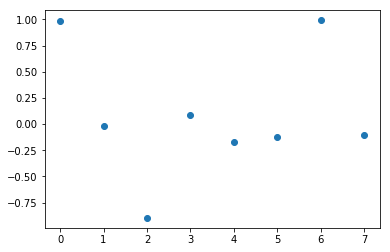

In [110]:
plt.plot(logit.coef_[0], 'o', label = 'linear regression')
logit.coef_[0]